# Example 3 - DenseNet's - 2016

![densenets](https://i.imgflip.com/2n3hoa.jpg)

---

## LiveLossPlot - Plot the loss function live during training

https://github.com/stared/livelossplot

In [1]:
%%capture pip_install

!pip install livelossplot
!pip install tqdm

## Load 2 decades of CNN Research with a single `git clone` 

![DenseNet Arch](https://github.com/titu1994/DenseNet/raw/master/images/dense_net.JPG?raw=true)
https://github.com/titu1994/DenseNet/

In [1]:
import sys

sys.path.append("/notebooks/CNN/DenseNet/")

In [18]:
import os

import numpy as np
import pandas as pd

## Finding all Available Images in Data Folder## Loading the images

In [19]:
DATA_DIRECTORY_DOGS = "../CNN/data/dogs/"
DATA_DIRECTORY_CATS = "../CNN/data/cats/"

SAMPLE_SIZE = 10000

DOGS = os.listdir(DATA_DIRECTORY_DOGS)
CATS = os.listdir(DATA_DIRECTORY_CATS)

CATS_SAMPLE = np.random.choice( CATS, size=int(SAMPLE_SIZE/2), replace=False)
DOGS_SAMPLE = np.random.choice( DOGS, size=int(SAMPLE_SIZE/2), replace=False)

CATS_SAMPLE_FULLPATH = [DATA_DIRECTORY_CATS + file for file in CATS_SAMPLE]
DOGS_SAMPLE_FULLPATH = [DATA_DIRECTORY_DOGS + file for file in DOGS_SAMPLE]

ANIMALS = CATS_SAMPLE_FULLPATH + DOGS_SAMPLE_FULLPATH
np.random.shuffle(ANIMALS)

## Loading the Images as arrays

In [20]:
from tqdm import tnrange, tqdm_notebook, tqdm
from keras.preprocessing import image

images = []
labels = []

for animal_path in tqdm_notebook(ANIMALS,desc="Loading Images",unit="images"):
    img = image.load_img(animal_path, grayscale=False, color_mode="rgb", target_size=(50,50) )
    img_label = np.array([1,0])
    if "dog" in animal_path:
        img_label = np.array([0,1])
    try:
        images.append( image.img_to_array(img)/255 ) 
        labels.append(img_label)
    except:
        pass


In [13]:
import numpy as np

images_data=np.array(images)
class_labels=np.array(labels)

print(images_data.shape)

(10000, 50, 50, 3)


## Display first few training sample

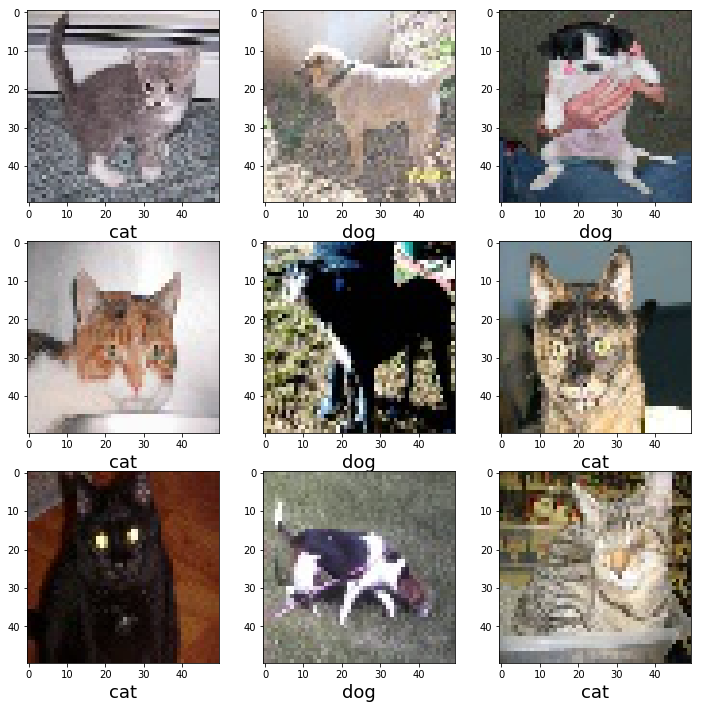

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

random_labels = class_labels[:9]
random_images = images_data[:9]
random_labels_titles = [ "dog" if l[1] > 0 else "cat" for l in random_labels]

for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(random_images[i])
    plt.xlabel(random_labels_titles[i],fontsize=18)
plt.show()

## Re-use a  DenseNet Design - `inputshape`, `classes`, and `complexity`!

- (?) Why would forwarding Signals be beneficial? (Discussion, I don't have the answer)

In [2]:
import densenet

image_dim=(50,50,3)

model = densenet.DenseNet(classes=2, input_shape=image_dim, nb_filter=32, depth=10, dropout_rate=0.5, growth_rate=12, bottleneck=True, reduction=0.5)
model.compile("adam", "categorical_crossentropy", ["accuracy"])
model.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 50, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 50, 50, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 50, 50, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 50, 50, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [ ]:
from livelossplot import PlotLossesKeras

model.fit(images_data,class_labels,validation_split=0.25,epochs=50,batch_size=25, callbacks=[PlotLossesKeras()],verbose=1)


## Uncomment lines to save/load a model

In [26]:
from keras.models import load_model

#model.save("models/densenets.hdf5")

model = load_model("models/densenet_v2.hdf5")

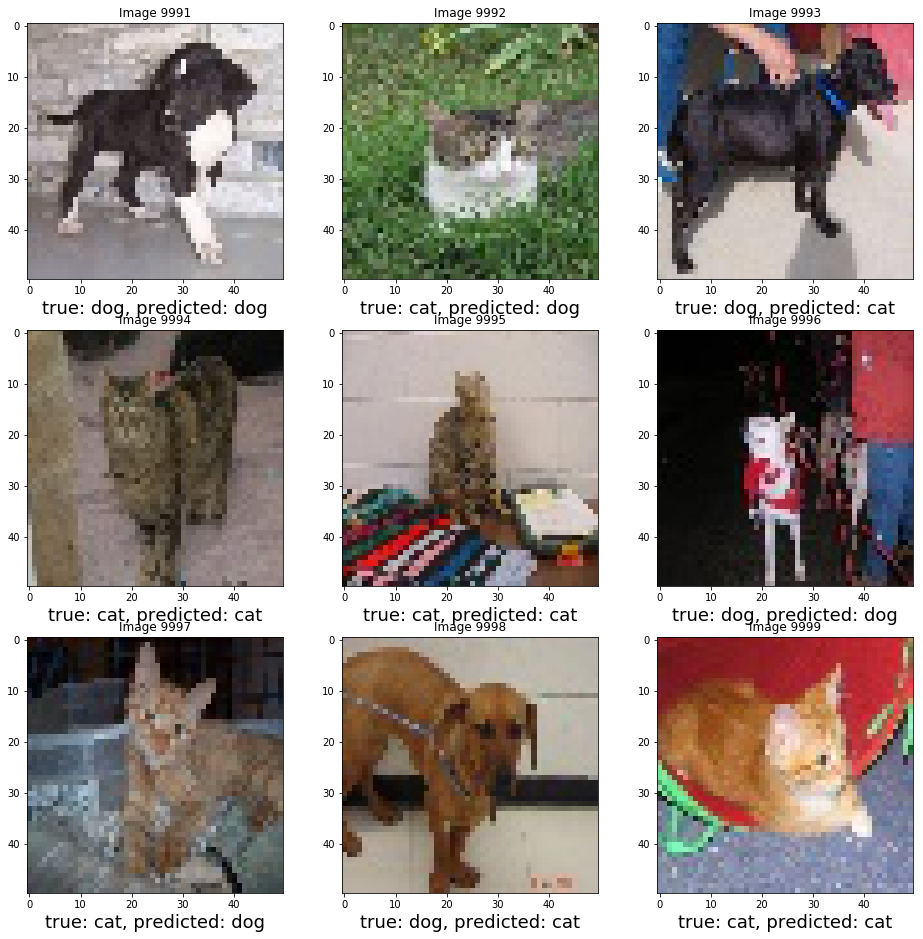

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))

tail_images = images_data[-9:]
tail_labels = class_labels[-9:]

predicted_labels = np.argmax(model.predict(tail_images),axis=1)

random_labels_titles = [ "true: dog" if l[1] > 0 else "true: cat" for l in tail_labels ]
predicted_labels = [ ", predicted: dog" if p > 0 else ", predicted: cat" for p in predicted_labels ]

new_labels = [ t + p for t,p in zip(random_labels_titles, predicted_labels)]

for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(tail_images[i])
    plt.xlabel(new_labels[i],fontsize=18)
    plt.title("Image {}".format(len(class_labels)-9+i))
plt.show()

In [ ]:
%%capture
!pip install keras-vis

In [ ]:
model.layers

In [ ]:
%matplotlib inline
from vis.visualization import visualize_cam, visualize_saliency, visualize_activation

image_index = 5002

cat_activation_heatmap = visualize_cam(model, 9, filter_indices=[0], seed_input=images_data[image_index])
dog_activation_heatmap = visualize_cam(model, 9, filter_indices=[1], seed_input=images_data[image_index])

import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(cat_activation_heatmap, cmap='jet')
plt.title("cat heatmap")
plt.subplot(1,3,2)
plt.imshow(dog_activation_heatmap, cmap='jet')
plt.title("dog heatmap")
plt.subplot(1,3,3)
plt.imshow(images_data[image_index])